In [25]:
import os
dir = os.getcwd()
dir

import pandas as pd
csv_name = 'csv_agileoutgoing_C_London'

csv_list = 'csv_agileoutgoing_C_London.csv'

csv_path = os.path.join(dir, 'data',csv_list)
csv_name= pd.read_csv(csv_path)


In [26]:
csv_agileoutgoing_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list))

In [27]:
column_names=['date_time', 'time', 'Letter', 'City', 'Price']
csv_agileoutgoing_C_London.columns = column_names
csv_agileoutgoing_C_London.head()

,date_time,time,Letter,City,Price
0,2019-05-15 23:30:00+00:00,00:30,C,London,4.24
1,2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2,2019-05-16 00:30:00+00:00,01:30,C,London,4.24
3,2019-05-16 01:00:00+00:00,02:00,C,London,4.24
4,2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [28]:
csv_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  84671 non-null  object 
 1   time       84671 non-null  object 
 2   Letter     84671 non-null  object 
 3   City       84671 non-null  object 
 4   Price      84671 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.2+ MB


In [29]:
df_agileoutgoing_C_London = pd.DataFrame(csv_agileoutgoing_C_London[['date_time', 'Price']])
df_agileoutgoing_C_London.columns = ['ds', 'y']
df_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      84671 non-null  object 
 1   y       84671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [30]:
df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].str.slice(stop=-6)

In [31]:
# Assuming 'ds' column has timezone information
# df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].dt.tz_localize(None)

# Now, convert 'ds' column to datetime without timezone
df_agileoutgoing_C_London['ds'] = pd.to_datetime(df_agileoutgoing_C_London['ds'], format='%Y-%m-%d %H:%M:%S')

In [32]:
df_agileoutgoing_C_London.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


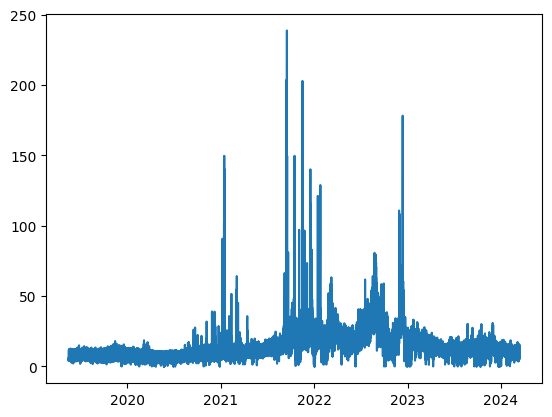

In [33]:
import matplotlib.pyplot as plt

plt.plot(df_agileoutgoing_C_London['ds'], df_agileoutgoing_C_London['y'])
plt.show()

In [34]:
df = df_agileoutgoing_C_London[df_agileoutgoing_C_London['ds']>'2023-06-01 00:00:00']

In [35]:
df.head()

,ds,y
70898,2023-06-01 00:30:00,7.28
70899,2023-06-01 01:00:00,7.57
70900,2023-06-01 01:30:00,6.79
70901,2023-06-01 02:00:00,7.53
70902,2023-06-01 02:30:00,6.62


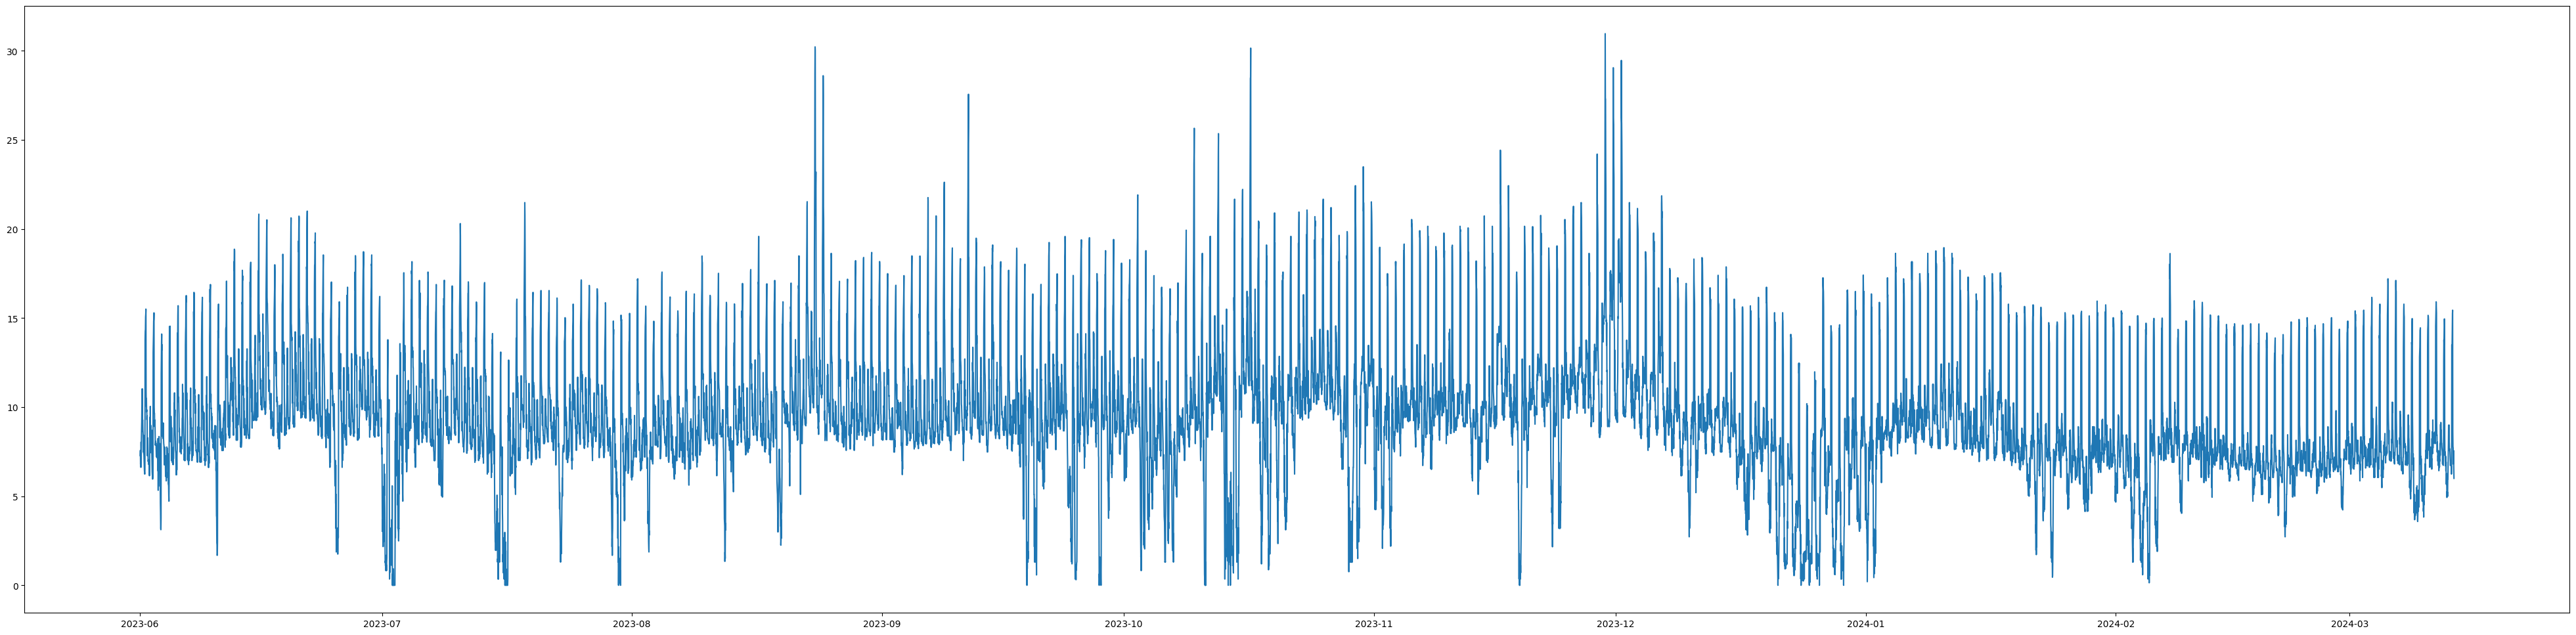

In [36]:
plt.figure(figsize=(50,12))
plt.plot(df['ds'], df['y'])
plt.show()

In [37]:
df['ds'][:10]

70898   2023-06-01 00:30:00
70899   2023-06-01 01:00:00
70900   2023-06-01 01:30:00
70901   2023-06-01 02:00:00
70902   2023-06-01 02:30:00
70903   2023-06-01 03:00:00
70904   2023-06-01 03:30:00
70905   2023-06-01 04:00:00
70906   2023-06-01 04:30:00
70907   2023-06-01 05:00:00
Name: ds, dtype: datetime64[ns]

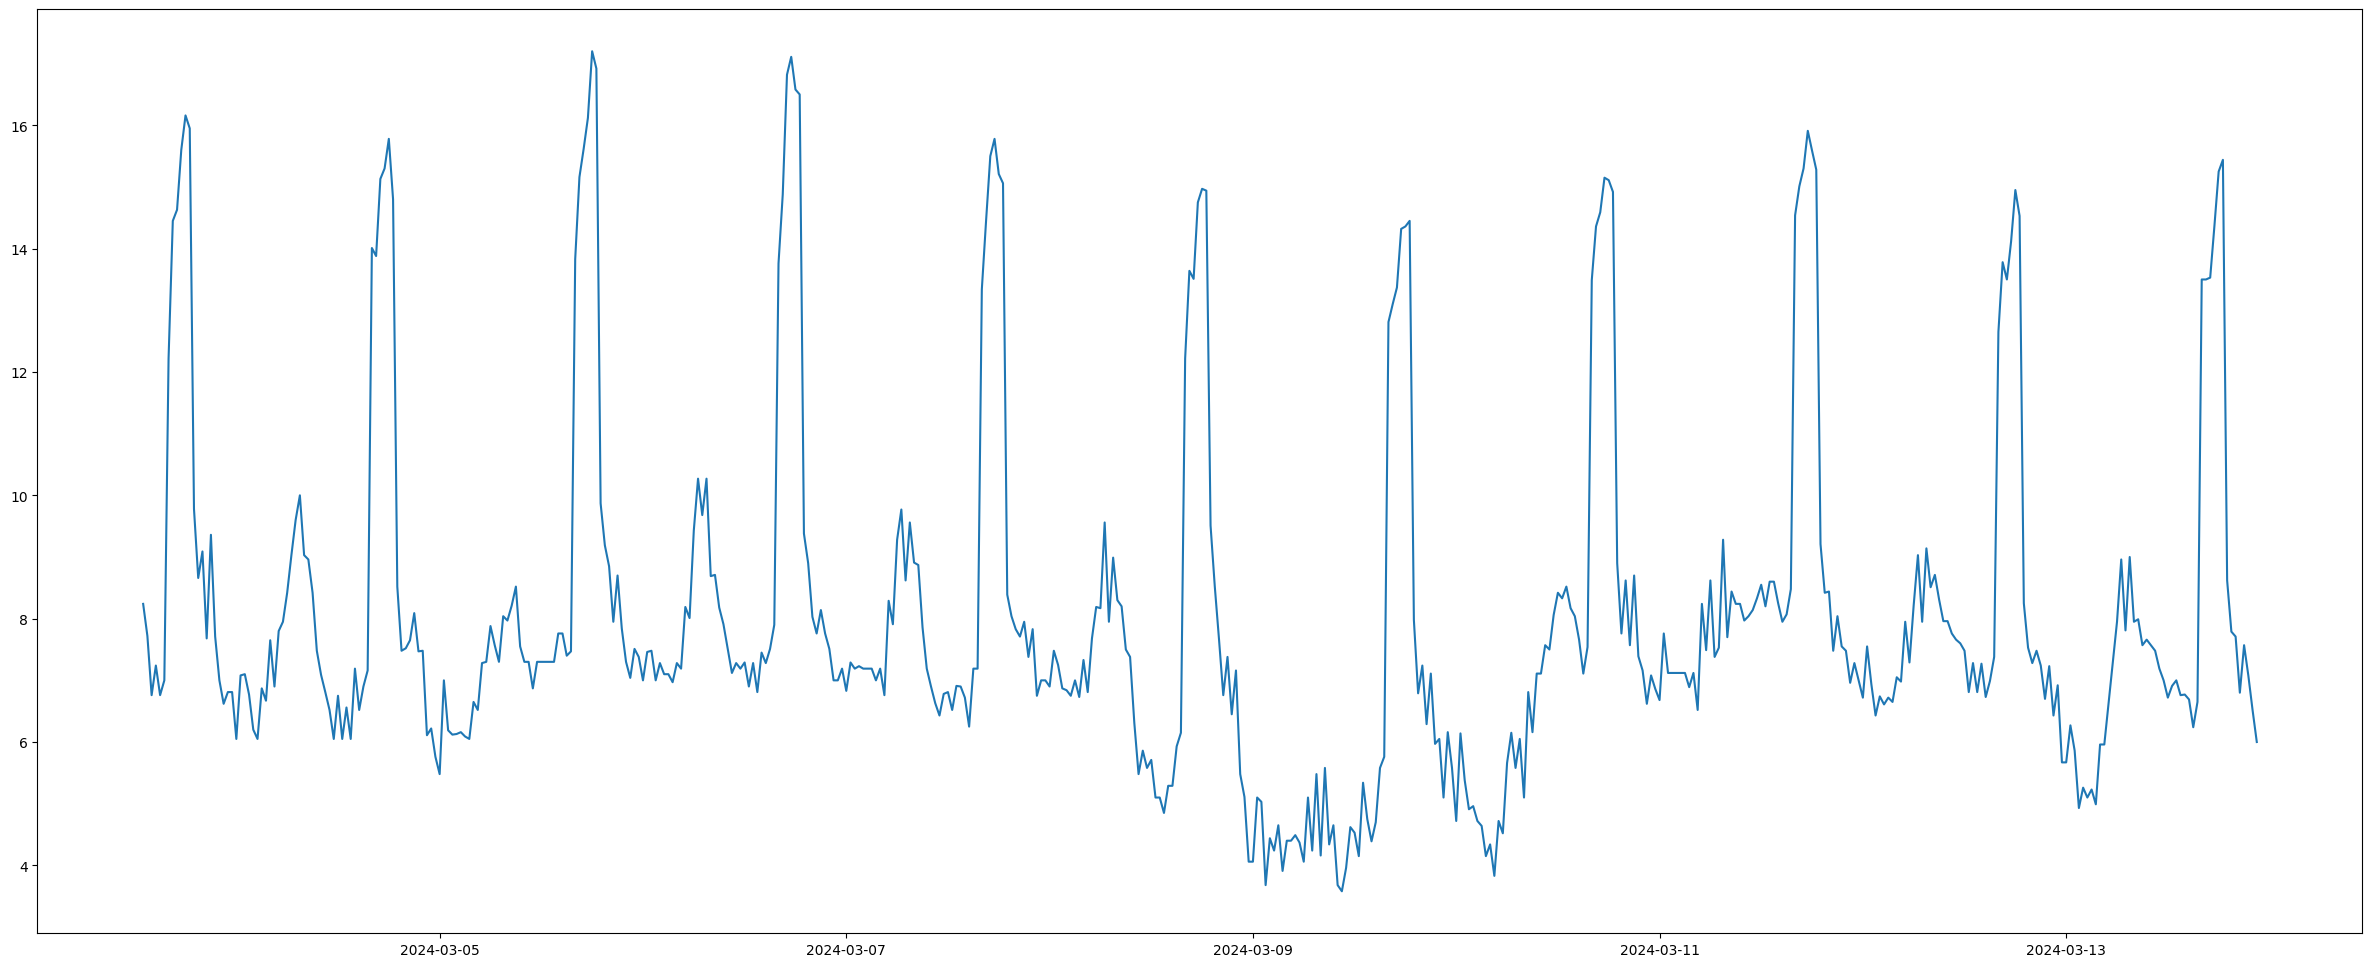

In [38]:
plt.figure(figsize=(30,12))
plt.plot(df['ds'][-500:], df['y'][-500:])
plt.show()

In [39]:
import numpy as np

In [40]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [41]:
split_ratio = round(df.shape[0]*0.9)
split_ratio, df.shape

(12396, (13773, 2))

In [42]:
train = df.iloc[:split_ratio]
test = df.iloc[split_ratio:]

check = len(train)+len(test)
check

13773

In [43]:
train['ds'][train.index[0]] - train['ds'][train.index[-1]]
# train['ds'][0]#- train['ds'][len(train)-1]

Timedelta('-259 days +18:30:00')

In [44]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=10, interval_width=0.95)
model.fit(train)

06:28:32 - cmdstanpy - INFO - Chain [1] start processing
06:28:33 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
horizon = 24*180

future = model.make_future_dataframe(periods = horizon, freq='30min')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
16711,2024-05-14 04:00:00,8.700122,4.023682,13.338288
16712,2024-05-14 04:30:00,8.997694,4.260363,13.961576
16713,2024-05-14 05:00:00,9.256356,4.531362,14.455581
16714,2024-05-14 05:30:00,9.446328,4.571878,14.213946
16715,2024-05-14 06:00:00,9.562156,4.737259,14.164625


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


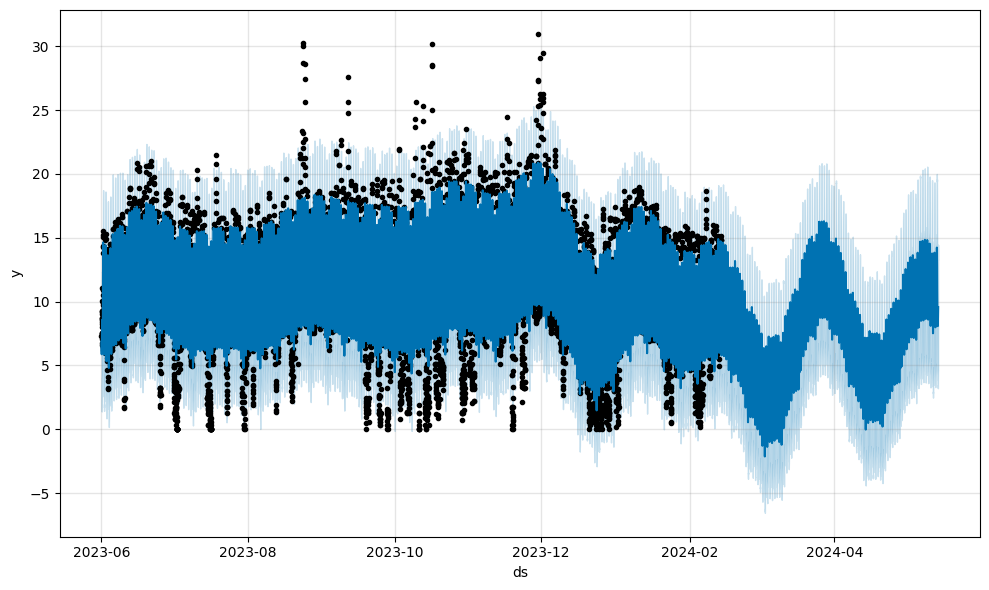

In [46]:
ax = model.plot(forecast)

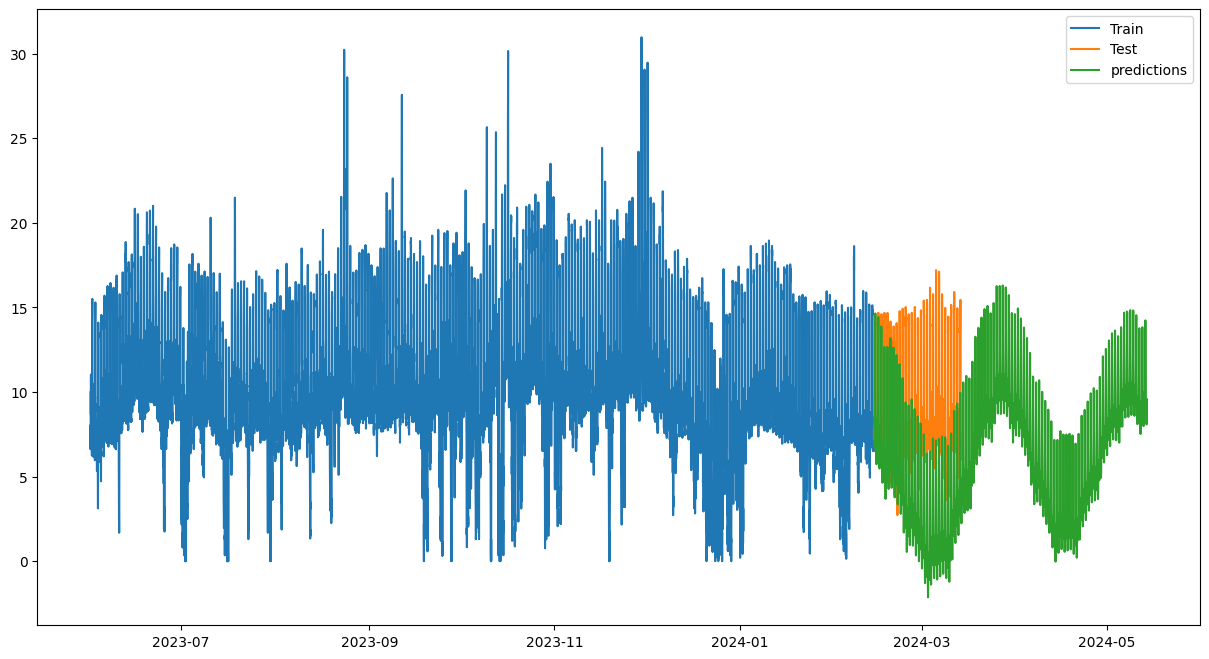

In [47]:
plt.figure(figsize=(15,8))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label='predictions')
plt.legend(loc='best')
plt.show()

In [48]:
df.shape, forecast.columns

((13773, 2),
 Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
        'daily', 'daily_lower', 'daily_upper', 'multiplicative_terms',
        'multiplicative_terms_lower', 'multiplicative_terms_upper', 'weekly',
        'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
        'yearly_upper', 'additive_terms', 'additive_terms_lower',
        'additive_terms_upper', 'yhat'],
       dtype='object'))

In [49]:
from datetime import timedelta
# train['ds'][0] - train['ds'][len(train)-1], train['ds'][0], train['ds'][0]+ timedelta(days=1)

train.tail()

,ds,y
83289,2024-02-14 04:00:00,6.78
83290,2024-02-14 04:30:00,6.78
83291,2024-02-14 05:00:00,7.24
83292,2024-02-14 05:30:00,6.50
83293,2024-02-14 06:00:00,7.84


In [50]:
forecast['ds'].tail()

16711   2024-05-14 04:00:00
16712   2024-05-14 04:30:00
16713   2024-05-14 05:00:00
16714   2024-05-14 05:30:00
16715   2024-05-14 06:00:00
Name: ds, dtype: datetime64[ns]

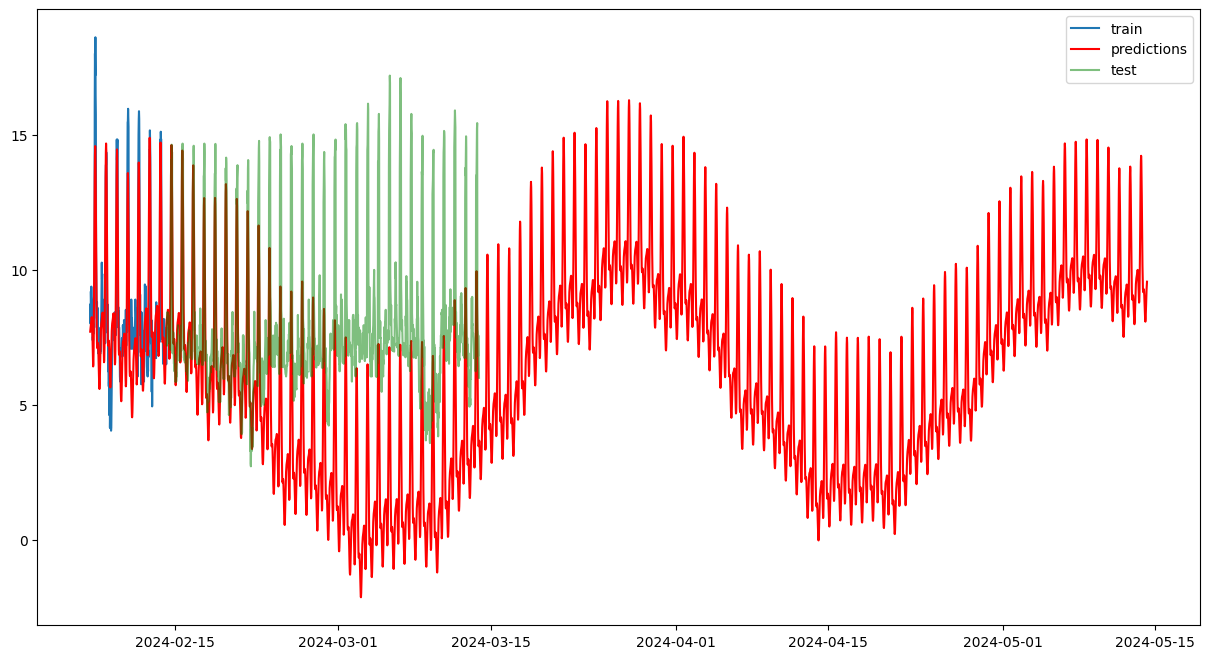

In [51]:
days =7

date = train['ds'][train.index[-1]]- timedelta(days=days)
date_end = date + timedelta(days=days+90)
# date
train_date=train.loc[train['ds'] >= date ].copy()
forecast_date=forecast.loc[(forecast['ds'] >= date ) & (forecast['ds'] <= date_end)].copy()
test_date=test.loc[test['ds'] <= date_end ].copy()

# train_date.head()
plt.figure(figsize=(15,8))
plt.plot(train_date['ds'], train_date['y'], label='train')
plt.plot(forecast_date['ds'], forecast_date['yhat'], label='predictions', color = 'red')
plt.plot(test_date['ds'], test_date['y'], label='test', color = 'green', alpha =0.5)
plt.legend(loc='best')

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

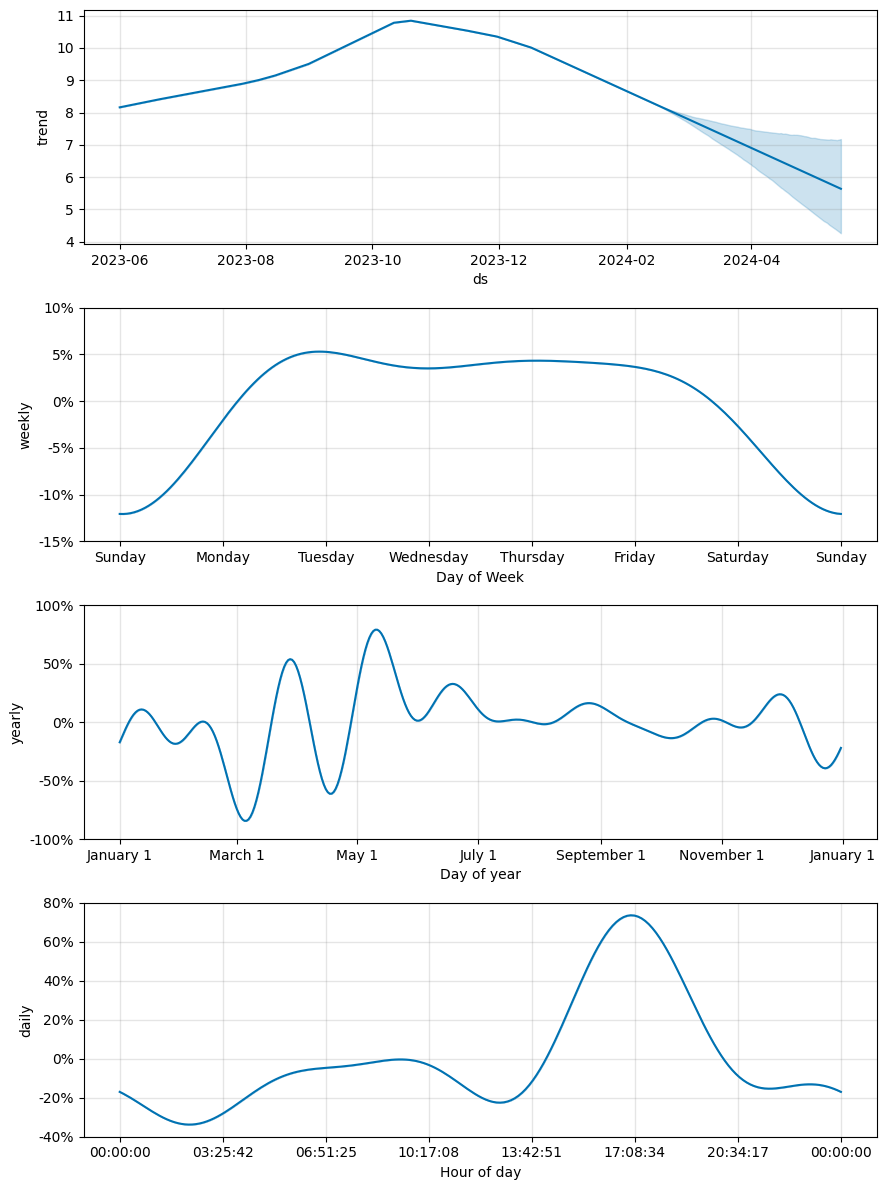

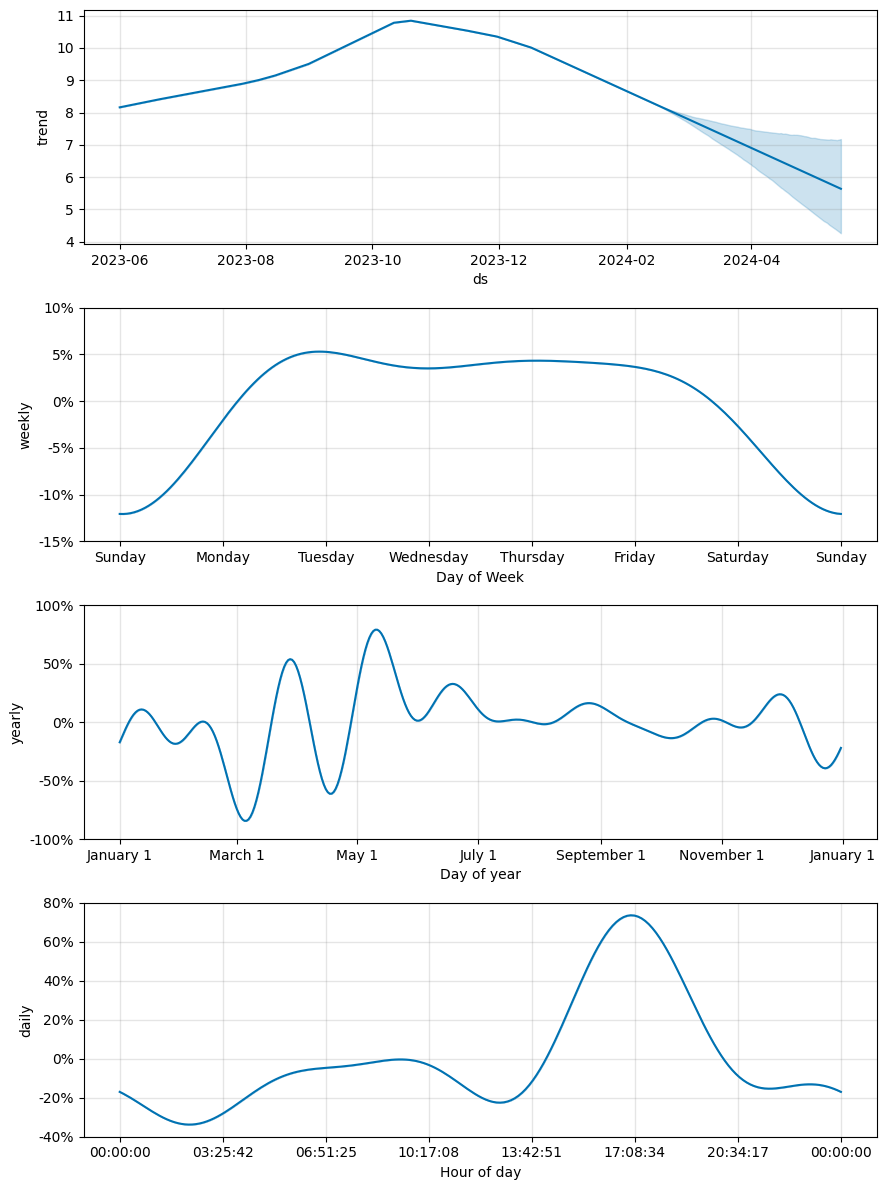

In [52]:
model.plot_components(forecast)

In [53]:
model

In [56]:
start_date=train['ds'][train.index[0]]
end_date=train['ds'][train.index[-1]]

initial=round(((end_date - start_date).days)/2)
horizon=round(initial/5)
period = round(horizon/2)

start_date, end_date, initial, horizon, period, (end_date - start_date).days

(Timestamp('2023-06-01 00:30:00'),
 Timestamp('2024-02-14 06:00:00'),
 129,
 26,
 13,
 258)

In [30]:
df_cv = cross_validation(model = model, initial='180 days', horizon='30 days', period='3 days')

df_p = performance_metrics(df_cv)

  0%|          | 0/17 [00:00<?, ?it/s]14:51:16 - cmdstanpy - INFO - Chain [1] start processing
14:51:17 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 1/17 [00:01<00:23,  1.46s/it]14:51:17 - cmdstanpy - INFO - Chain [1] start processing
14:51:18 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▏        | 2/17 [00:02<00:19,  1.31s/it]14:51:18 - cmdstanpy - INFO - Chain [1] start processing
14:51:19 - cmdstanpy - INFO - Chain [1] done processing
 18%|█▊        | 3/17 [00:04<00:20,  1.44s/it]14:51:20 - cmdstanpy - INFO - Chain [1] start processing
14:51:20 - cmdstanpy - INFO - Chain [1] done processing
 24%|██▎       | 4/17 [00:05<00:16,  1.29s/it]14:51:21 - cmdstanpy - INFO - Chain [1] start processing
14:51:22 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▉       | 5/17 [00:06<00:14,  1.22s/it]14:51:22 - cmdstanpy - INFO - Chain [1] start processing
14:51:23 - cmdstanpy - INFO - Chain [1] done processing
 35%|███▌      | 6/17 [00:07<00:13,  1.22s/it]14:51:23

In [31]:
df_p

,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days 00:00:00,12.675253,3.560232,2.991392,0.292291,0.386653,0.816176
1,3 days 00:30:00,12.702152,3.564008,2.995030,0.292299,0.387073,0.816176
2,3 days 01:00:00,12.734220,3.568504,2.999322,0.292577,0.387544,0.815359
3,3 days 01:30:00,12.764852,3.572793,3.003416,0.292577,0.388032,0.814951
4,3 days 02:00:00,12.793617,3.576817,3.008022,0.293470,0.388564,0.814134
...,...,...,...,...,...,...,...
1292,29 days 22:00:00,21.611768,4.648846,3.759725,0.420391,0.536183,0.827206
1293,29 days 22:30:00,21.586270,4.646103,3.759367,0.420928,0.536195,0.827614
1294,29 days 23:00:00,21.554198,4.642650,3.759336,0.422156,0.536355,0.828023
1295,29 days 23:30:00,21.522253,4.639208,3.759297,0.424114,0.536454,0.828431


In [32]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-11-28 06:30:00,11.392452,6.745779,15.903013,10.42,2023-11-28 06:00:00
1,2023-11-28 07:00:00,11.376285,7.114394,16.077082,10.61,2023-11-28 06:00:00
2,2023-11-28 07:30:00,11.357055,6.900942,15.610791,13.13,2023-11-28 06:00:00
3,2023-11-28 08:00:00,11.362497,6.817945,15.853293,11.94,2023-11-28 06:00:00
4,2023-11-28 08:30:00,11.380854,6.675052,15.881579,13.00,2023-11-28 06:00:00


In [33]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
24475,2024-02-14 04:00:00,4.483660,-1.089803,9.642239,6.78,2024-01-15 06:00:00
24476,2024-02-14 04:30:00,4.767921,-0.844468,10.097683,6.78,2024-01-15 06:00:00
24477,2024-02-14 05:00:00,5.008651,-0.766953,10.654503,7.24,2024-01-15 06:00:00
24478,2024-02-14 05:30:00,5.180586,0.003672,10.813456,6.50,2024-01-15 06:00:00
24479,2024-02-14 06:00:00,5.281856,-0.118849,10.346394,7.84,2024-01-15 06:00:00


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


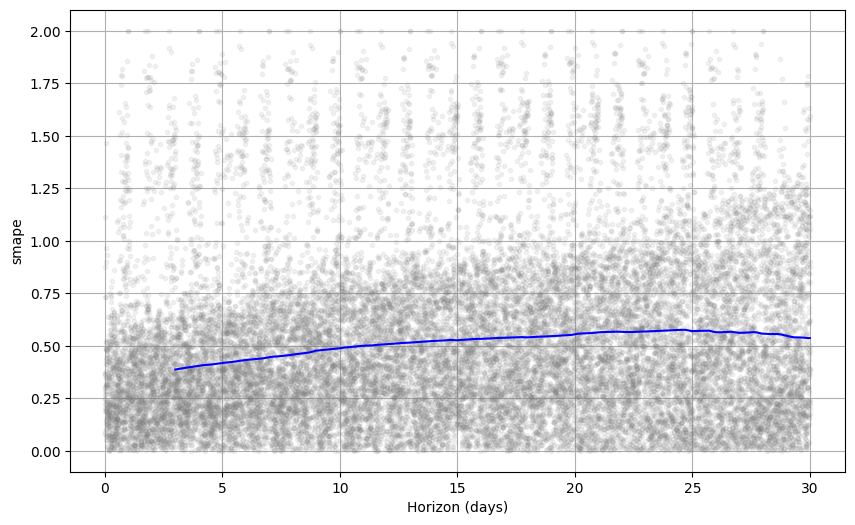

In [34]:
plot_cross_validation_metric(df_cv, metric='smape');

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
df.head()

,ds,y
70898,2023-06-01 00:30:00,7.28
70899,2023-06-01 01:00:00,7.57
70900,2023-06-01 01:30:00,6.79
70901,2023-06-01 02:00:00,7.53
70902,2023-06-01 02:30:00,6.62


In [37]:
df_index=df.copy()
df_index.set_index('ds', inplace=True)

In [38]:
df_index.head()

,y
ds,
2023-06-01 00:30:00,7.28
2023-06-01 01:00:00,7.57
2023-06-01 01:30:00,6.79
2023-06-01 02:00:00,7.53
2023-06-01 02:30:00,6.62


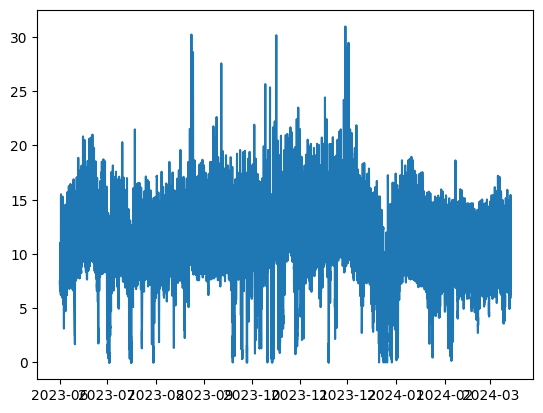

In [39]:
plt.plot(df_index)

# plt.plot(

# df['ds']['2019']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13773 entries, 70898 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      13773 non-null  datetime64[ns]
 1   y       13773 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 322.8 KB


In [41]:
date1 = df_index.index[0]
date1

Timestamp('2023-06-01 00:30:00')

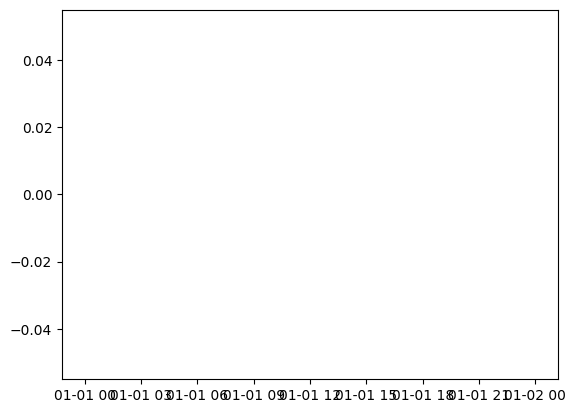

In [42]:
date = '2019-06-01'

df_date=df_index.loc[df_index.index <= date ].copy()
plt.plot(df_date)


# df_date.tail()

# df_index.set_index('ds', inplace=True)

In [43]:
Prophet(growth = 'linear', changepoints = None, n_changepoints= 25, changepoint_range= 0.8, yearly_seasonality= 'auto', weekly_seasonality= 'auto',
        daily_seasonality= 'auto', holidays: Any | None = None, seasonality_mode: str = 'additive', seasonality_prior_scale: float = 10, holidays_prior_scale: float = 10,
        changepoint_prior_scale: float = 0.05, mcmc_samples: int = 0, interval_width: float = 0.8, uncertainty_samples: int = 1000, stan_backend: Any | None = None,
        scaling: str = 'absmax', holidays_mode: Any | None = None)

SyntaxError: positional argument follows keyword argument (1082694179.py, line 2)

In [ ]:
df_index.index = pd.to_datetime(df_index.index)
df_index = df_index.asfreq('30T')


In [ ]:
# Now, you can run seasonal decomposition
result_add = seasonal_decompose(df_index['y'], model='additive')
result_add.plot();